# Lab №6

In [111]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.special import erf
from scipy.stats import chi2, t, zscore

# Исходные данные

In [112]:
x = np.array(
    [128, 132, 129, 126, 130, 128, 129, 129, 127, 130, 128, 131, 127, 129, 127, 131, 130, 127, 130, 128, 129, 129, 126,
     128, 128, 130, 129, 127, 131, 128, 130, 126, 130, 129, 129, 127, 129, 126, 130, 126, 130, 129, 127, 129, 130, 128,
     131, 127, 132, 129, 129, 129, 130, 129, 130, 129, 128, 129, 127, 131, 129, 131, 128, 132, 128, 126, 129, 128, 128,
     129, 127, 128, 128, 130, 128, 127, 129, 128, 131, 129, 127, 130, 126, 131, 130, 129, 129, 127, 132, 127, 130, 128,
     128, 130, 129, 131, 127, 129, 130, 131, ])

y = np.array(
    [25, 31, 27, 25, 28, 27, 26, 28, 26, 27, 26, 28, 27, 28, 26, 28, 28, 26, 27, 27, 26, 28, 25, 27, 26, 27, 26, 26, 29,
     27, 29, 25, 27, 27, 27, 26, 28, 25, 29, 25, 28, 27, 26, 29, 28, 27, 29, 26, 30, 29, 27, 26, 28, 27, 28, 26, 25, 28,
     27, 28, 28, 19, 18, 31, 26, 25, 27, 27, 28, 26, 26, 26, 27, 29, 26, 26, 28, 27, 30, 26, 27, 28, 27, 30, 29, 28, 27,
     26, 30, 33, 28, 27, 26, 28, 28, 28, 26, 28, 28, 29, ])

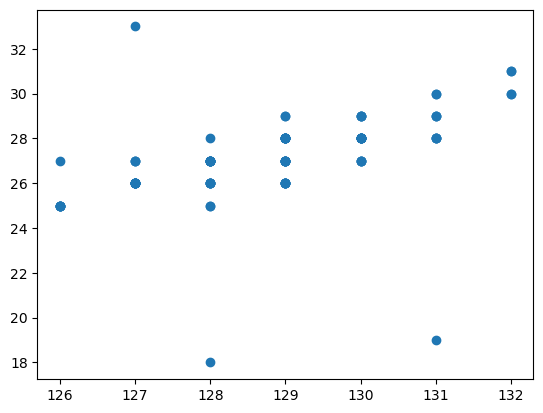

In [113]:
plt.scatter(x, y)

### Фильтрация от выбросов

In [114]:
data = pd.DataFrame({'x': x, 'y': y})
z = np.abs(zscore(data))
data_clean = data[(z < 3).all(axis=1)]
data_clean.shape

(97, 2)

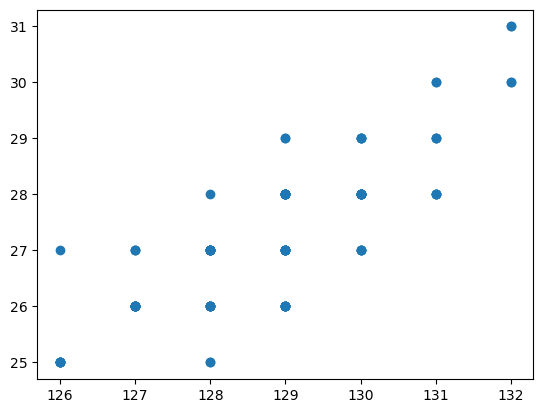

In [115]:
plt.scatter(data_clean['x'], data_clean['y'])

In [116]:
x = np.array(data_clean['x'])
y = np.array(data_clean['y'])

# Группирование данных по интервалам

### Для x

In [117]:
N = 5
n = x.__len__()

In [118]:
h_x = (np.max(x) - np.min(x)) / (N - 1)
h_x

1.5

In [119]:
x_intervals = [np.min(x) - h_x / 2, ]
for i in range(1, N + 1):
    x_intervals.append(x_intervals[i - 1] + h_x)

x_intervals

[125.25, 126.75, 128.25, 129.75, 131.25, 132.75]

In [120]:
x_avgs = [x_intervals[0] + h_x / 2, ]
for i in range(2, N + 1):
    x_avgs.append((x_intervals[i - 1] + x_intervals[i]) / 2)

x_avgs

[126.0, 127.5, 129.0, 130.5, 132.0]

In [121]:
m_x = []
for i in range(N):
    m_i = 0
    for x_i in x:
        if i == N - 1:
            if x_intervals[i] <= x_i <= x_intervals[i + 1]:
                m_i += 1
        else:
            if x_intervals[i] <= x_i < x_intervals[i + 1]:
                m_i += 1
    m_x.append(m_i)

m_x = np.array(m_x)
m_x

array([ 7, 32, 27, 27,  4])

In [122]:
p_x = m_x / n
p_x

array([0.07216495, 0.32989691, 0.27835052, 0.27835052, 0.04123711])

In [123]:
f_x = p_x / h_x
f_x

array([0.04810997, 0.21993127, 0.18556701, 0.18556701, 0.02749141])

Проверка условий

In [124]:
np.sum(m_x) == n

True

In [125]:
np.sum(p_x) == 1

True

### Для y

In [126]:
h_y = (np.max(y) - np.min(y)) / (N - 1)
h_y

1.5

In [127]:
y_intervals = [np.min(y) - h_y / 2, ]
for i in range(1, N + 1):
    y_intervals.append(y_intervals[i - 1] + h_y)

y_intervals

[24.25, 25.75, 27.25, 28.75, 30.25, 31.75]

In [128]:
y_avgs = [y_intervals[0] + h_y / 2, ]
for i in range(2, N + 1):
    y_avgs.append((y_intervals[i - 1] + y_intervals[i]) / 2)

y_avgs

[25.0, 26.5, 28.0, 29.5, 31.0]

In [129]:
m_y = []
for i in range(N):
    m_i = 0
    for y_i in y:
        if i == N - 1:
            if y_intervals[i] <= y_i <= y_intervals[i + 1]:
                m_i += 1
        else:
            if y_intervals[i] <= y_i < y_intervals[i + 1]:
                m_i += 1
    m_y.append(m_i)

m_y = np.array(m_y)
m_y

array([ 8, 49, 25, 13,  2])

In [130]:
p_y = m_y / n
p_y

array([0.08247423, 0.50515464, 0.25773196, 0.13402062, 0.02061856])

In [131]:
f_y = p_y / h_y
f_y

array([0.05498282, 0.33676976, 0.17182131, 0.08934708, 0.0137457 ])

Проверка условий

In [132]:
np.sum(m_y) == n

True

In [133]:
np.sum(p_y) == 1

True

# Статистический ряд и графики

In [134]:
df = pd.DataFrame(
    data={'x_avg_i': x_avgs, 'm_x': m_x, 'p_x': p_x, 'f_x': f_x, 'y_avg_i': y_avgs, 'm_y': m_y,
          'p_y': p_y, 'f_y': f_y})
df.T

,0,1,2,3,4
x_avg_i,126.000000,127.500000,129.000000,130.500000,132.000000
m_x,7.000000,32.000000,27.000000,27.000000,4.000000
p_x,0.072165,0.329897,0.278351,0.278351,0.041237
f_x,0.048110,0.219931,0.185567,0.185567,0.027491
y_avg_i,25.000000,26.500000,28.000000,29.500000,31.000000
m_y,8.000000,49.000000,25.000000,13.000000,2.000000
p_y,0.082474,0.505155,0.257732,0.134021,0.020619
f_y,0.054983,0.336770,0.171821,0.089347,0.013746


## Графики

### Для x

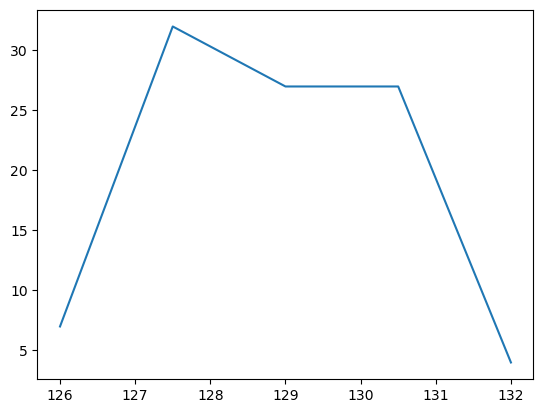

In [135]:
plt.plot(df['x_avg_i'], df['m_x'])

<BarContainer object of 5 artists>

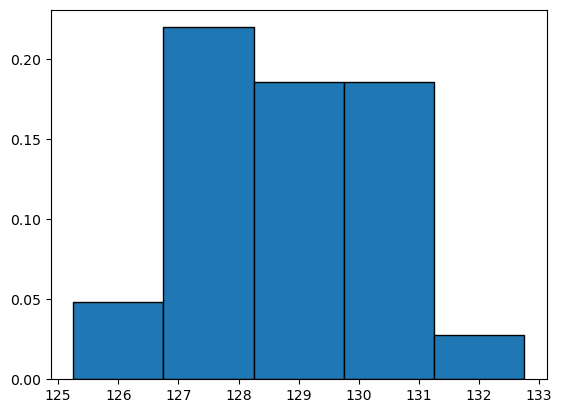

In [136]:
plt.bar(df['x_avg_i'], height=df['f_x'], width=np.array(x_intervals[:-1]) - np.array(x_intervals[1:]),
        edgecolor='black')

# TODO: отложить три сигмы от среднего выборочного влево и вправо

### Для y

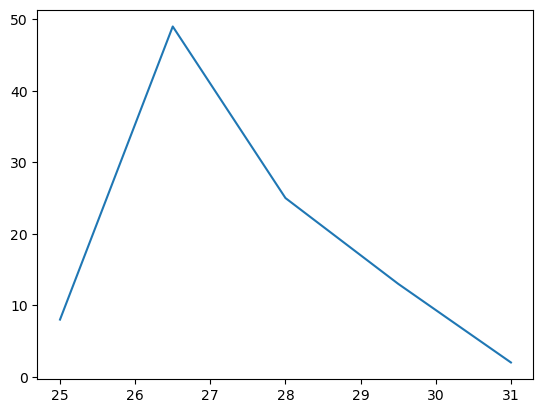

In [137]:
plt.plot(df['y_avg_i'], df['m_y'])

<BarContainer object of 5 artists>

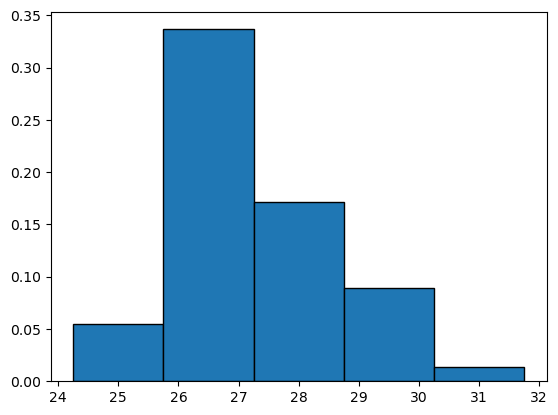

In [138]:
plt.bar(df['y_avg_i'], height=df['f_y'], width=np.array(y_intervals[:-1]) - np.array(y_intervals[1:]),
        edgecolor='black')

# Числовые характеристики

### Для x

In [139]:
m_k_x = np.array([np.sum(np.power(x_avgs, k) * m_x) for k in range(1, 5)]) / n
m_k_x

array([1.28829897e+02, 1.65995026e+04, 2.13912055e+06, 2.75700288e+08])

In [140]:
x_sample = m_k_x[0]
x_sample

128.8298969072165

In [141]:
s_2_x = m_k_x[1] - x_sample ** 2
s_2_x

2.360240195557708

In [142]:
s_2_x_corrected = (s_2_x * n) / (n - 1)
s_2_x_corrected

2.384826030928101

In [143]:
a_sample_x = (m_k_x[2] - 3 * m_k_x[0] * m_k_x[1] + 2 * m_k_x[0] ** 3) / s_2_x_corrected ** (3 / 4)
a_sample_x

0.10440109334601914

In [144]:
excess_x = (m_k_x[3] - 4 * m_k_x[0] * m_k_x[2] + 6 * m_k_x[0] ** 2 * m_k_x[1] -
            3 * m_k_x[0] ** 4) / s_2_x_corrected ** 2 - 3
excess_x

-0.8917337046401208

### Для y

In [145]:
m_k_y = np.array([np.sum(np.power(y_avgs, k) * m_y) for k in range(1, 5)]) / n
m_k_y

array([2.72577320e+01, 7.44798969e+02, 2.04020052e+04, 5.60292741e+05])

In [146]:
y_sample = m_k_y[0]
y_sample

27.257731958762886

In [147]:
s_2_y = m_k_y[1] - y_sample ** 2
s_2_y

1.8150175364013421

In [148]:
s_2_y_corrected = (s_2_y * n) / (n - 1)
s_2_y_corrected

1.8339239690721894

In [149]:
a_sample_y = (m_k_y[2] - 3 * m_k_y[0] * m_k_y[1] + 2 * m_k_y[0] ** 3) / (s_2_y_corrected ** (3 / 4))
a_sample_y

# TODO добавить вычисления для "больших" размеров выборок, сравнить результаты

0.9695689254437352

In [150]:
excess_y = (m_k_y[3] - 4 * m_k_y[0] * m_k_y[2] + 6 * m_k_y[0] ** 2 * m_k_y[1] - 3 * m_k_y[
    0] ** 4) / s_2_y_corrected ** 2 - 3
excess_y

-0.08040696264984559

# Выборочный коэффициент корреляции

In [151]:
n_corr = []
for i in range(N):
    n_i = []
    for j in range(N):
        n_i_j = 0

        for k in range(n):
            if x_intervals[i] <= x[k] < x_intervals[i + 1] and y_intervals[j] <= y[k] < y_intervals[j + 1]:
                n_i_j += 1
        n_i.append(n_i_j)
    n_corr.append(n_i)
np.sum(n_corr)

97

In [152]:
n_corr

[[6, 1, 0, 0, 0],
 [2, 29, 1, 0, 0],
 [0, 15, 10, 2, 0],
 [0, 4, 14, 9, 0],
 [0, 0, 0, 2, 2]]

In [153]:
r_sample = (np.sum(
    [x_avgs[i] * y_avgs[j] * n_corr[i][j] for i in range(N) for j in range(N)]) - n * x_sample * y_sample) / (
                   n * np.sqrt(s_2_x_corrected * s_2_y_corrected))
r_sample

0.7825823257842599

In [154]:
r = (np.sum(x * y) / n - np.sum(x) / n * np.sum(y) / n) / (np.sqrt(s_2_x_corrected * s_2_y_corrected))
r

0.8060104998337463

# Lab №7

## Доверительный интервал, дисперсия неизвестна

In [155]:
gamma_1 = 0.99
gamma_2 = 0.95

In [156]:
sigma_x = s_2_x_corrected ** 0.5
sigma_y = s_2_y_corrected ** 0.5
(sigma_x, sigma_y)

(1.5442881955542174, 1.35422448991007)

### Для x

In [205]:
t_1 = t.ppf(gamma_1, n - 1)
t_2 = t.ppf(gamma_2, n - 1)
(t_1, t_2)

(2.3658206896788494, 1.6608814403008005)

In [158]:
length = t_1 * sigma_x / n ** 0.5
confidence_interval_dispersion_unknown_x_1 = (x_sample - length, x_sample + length)
confidence_interval_dispersion_unknown_x_1

(128.45893927564194, 129.20085453879105)

In [159]:
length = t_2 * sigma_x / n ** 0.5
confidence_interval_dispersion_unknown_x_2 = (x_sample - length, x_sample + length)
confidence_interval_dispersion_unknown_x_2

(128.5694728403766, 129.0903209740564)

### Для y

In [160]:
length = t_1 * sigma_y / n ** 0.5
confidence_interval_dispersion_unknown_y_1 = (y_sample - length, y_sample + length)
confidence_interval_dispersion_unknown_y_1

(26.932430042421405, 27.583033875104366)

In [161]:
length = t_2 * sigma_y / n ** 0.5
confidence_interval_dispersion_unknown_y_2 = (y_sample - length, y_sample + length)
confidence_interval_dispersion_unknown_y_2

(27.029359657471026, 27.486104260054745)

## Доверительный интервал, дисперсия известна

In [162]:
big_f = lambda x: erf(x / 2 ** 0.5) / 2

In [163]:
z_1 = 0
for i in range(500):
    if np.abs(np.round(big_f(float(i / 100)), 3) - gamma_1 / 2) <= 0.001:
        z_1 = float(i / 100)
        break
z_1

2.55

In [164]:
z_2 = 0
for i in range(500):
    if np.abs(np.round(big_f(float(i / 100)), 3) - gamma_2 / 2) <= 0.001:
        z_2 = float(i / 100)
        break
z_2

1.96

### Для x

In [165]:
length = z_1 * sigma_x / n ** 0.5
confidence_interval_x_1 = (x_sample - length, x_sample + length)
confidence_interval_x_1

(128.43006019742614, 129.22973361700684)

In [166]:
length = z_2 * sigma_x / n ** 0.5
confidence_interval_x_2 = (x_sample - length, x_sample + length)
confidence_interval_x_2

(128.52257143616194, 129.13722237827105)

Вот такой занимательный результат

### Для y

In [167]:
length = z_1 * sigma_y / n ** 0.5
confidence_interval_y_1 = (y_sample - length, y_sample + length)
confidence_interval_y_1

(26.90710526491003, 27.608358652615742)

In [168]:
length = z_2 * sigma_y / n ** 0.5
confidence_interval_y_2 = (y_sample - length, y_sample + length)
confidence_interval_y_2

(26.98823065682108, 27.52723326070469)

Тоже занимательные результаты

## Доверительные интервалы для дисперсии

In [169]:
chi2_1_1 = chi2.ppf(1 - (1 - gamma_1) / 2, n - 1)
chi2_1_2 = chi2.ppf((1 - gamma_1) / 2, n - 1)

chi2_2_1 = chi2.ppf(1 - (1 - gamma_2) / 2, n - 1)
chi2_2_2 = chi2.ppf((1 - gamma_2) / 2, n - 1)

### Для x

In [170]:
sas = (n - 1) * s_2_x_corrected
confidence_interval_sigma_x_1 = (sas / chi2_1_2, sas / chi2_1_1)
confidence_interval_sigma_x_1

(3.573702900514604, 1.6904537045927421)

In [171]:
confidence_interval_sigma_x_2 = (sas / chi2_2_2, sas / chi2_2_1)
confidence_interval_sigma_x_2

(3.234447195549309, 1.8315453268001072)

### Для y

In [172]:
sas = (n - 1) * s_2_y_corrected
confidence_interval_sigma_y_1 = (sas / chi2_1_2, sas / chi2_1_1)
confidence_interval_sigma_y_1

(2.7481666681766144, 1.2999537606745344)

In [173]:
confidence_interval_sigma_y_2 = (sas / chi2_2_2, sas / chi2_2_1)
confidence_interval_sigma_y_2

(2.487280062230684, 1.408452789302072)

## Проверка гипотез о законах распределения случайных величин

### Проверка гипотезы о том, что x распределена по нормальному закону

In [174]:
u_x = (x_intervals - x_sample) / s_2_x_corrected ** 0.5
u_x

array([-2.31815338, -1.3468321 , -0.37551081,  0.59581048,  1.56713177,
        2.53845306])

In [175]:
f_x = big_f(u_x)
f_x

array([-0.48977951, -0.41098284, -0.14635969,  0.22434908,  0.44145805,
        0.49443281])

In [176]:
df['p_x']

0    0.072165
1    0.329897
2    0.278351
3    0.278351
4    0.041237
Name: p_x, dtype: float64

In [177]:
r_x = np.array([big_f(u_x[i + 1]) - big_f(u_x[i]) for i in range(N)])
r_x

array([0.07879666, 0.26462315, 0.37070877, 0.21710897, 0.05297476])

In [178]:
chi2_x_observed = np.sum((df['p_x'] - r_x) ** 2 / r_x) * n
chi2_x_observed

5.7758352772846635

In [210]:
chi2.ppf(0.9, N_x - 1 - 2)
# TODO: сделать N_x = 7 и N_y = 5

4.605170185988092

In [206]:
chi2_x_observed < chi2.ppf(0.9, N_x - 1 - 2)

False

Наблюдаемая $ \chi_p^2\left(k\right) $ меньше рассчитанной $ \chi_{набл}^2 $, следовательно, гипотеза о том, что величина X распределена по нормальному закону, верна.

### Проверка гипотез о законе распеределения y

##### Проверка гипотезы о том, что величина Y распределена по нормальному закону

In [180]:
u_y = (y_intervals - y_sample) / s_2_y_corrected ** 0.5
u_y

array([-2.22099953, -1.11335452, -0.00570951,  1.1019355 ,  2.20958051,
        3.31722552])

In [181]:
f_y = big_f(u_y)
f_y

array([-0.4868245 , -0.3672219 , -0.00227775,  0.36475514,  0.48643286,
        0.49954542])

In [182]:
r_y_gauss = np.array([big_f(u_y[i + 1]) - big_f(u_y[i]) for i in range(N)])
r_y_gauss

array([0.1196026 , 0.36494415, 0.3670329 , 0.12167771, 0.01311256])

In [183]:
chi2_y_observed_gauss = np.sum((df['p_y'] - r_y_gauss) ** 2 / r_y_gauss) * n
chi2_y_observed_gauss

10.038758048527903

In [184]:
chi2_y_observed_gauss < chi2.ppf(0.9, N - 1 - 2)

False

In [185]:
chi2.ppf(0.9, N - 1 - 2)

4.605170185988092

Наблюдаемая $ \chi_p^2\left(k\right) $ больше рассчитанной $ \chi_{набл}^2 $, следовательно, гипотеза о том, что величина Y распределена по нормальному закону, не верна.

##### Проверка гипотезы о том, что величина Y распределена по закону Пуассона

In [225]:
exponential = lambda x, l: l * np.e ** (-l * x)
exponential(1, 1 / y_sample)

0.03536530371245607

In [227]:
r_y_poisson = np.array(
    [exponential(u_y[i], 1 / y_sample) - exponential(u_y[i + 1], 1 / y_sample) for i in range(N)])
r_y_poisson

array([0.00158494, 0.00152183, 0.00146123, 0.00140304, 0.00134717])

In [228]:
chi2_y_observed_poisson = np.sum((df['p_y'] - r_y_poisson) ** 2 / r_y_poisson) * n
chi2_y_observed_poisson

22169.911713929305

In [189]:
chi2_y_observed_poisson < chi2.ppf(0.9, N - 1 - 1)

False

Наблюдаемая $ \chi_p^2\left(k\right) $ больше рассчитанной $ \chi_{набл}^2 $, следовательно, гипотеза о том, что величина Y распределена по закону Пуассона, не верна.

##### Проверка гипотезы о том, что величина Y распределена по равномерному закону

In [190]:
r_y_N = np.array([1 / N for i in range(N)])
r_y_N

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [191]:
chi2_y_observed_N = np.sum((df['p_y'] - r_y_N) ** 2 / r_y_N) * n
chi2_y_observed_N

71.19587628865979

In [230]:
chi2_y_observed_N < chi2.ppf(0.9, N - 1 - 1)

False

Наблюдаемая $ \chi_p^2\left(k\right) $ меньше рассчитанной $ \chi_{набл}^2 $, следовательно, гипотеза о том, что величина Y распределена по равномерному закону, может быть верна, но для неё $ \chi_{набл}^2 $ больше, чем та же величина, вычисленная при проверке гипотезы о том, что Y распределена по нормальному закону.

# Lab №8

## Проверка гипотезы о виде связи между X и Y

In [193]:
t_observed = r_sample * np.sqrt(n - 2) / np.sqrt(1 - r_sample ** 2)
t_observed

12.252356283794375

In [194]:
t_observed < t.ppf(0.9, n - 2)

False

$ |T_{набл} |≥T_p (k) $, значит, X и Y связаны линейно.

## Метод наименьших квадратов для линейной регрессии

In [195]:
def cool_regression(x, y, scale: int = 2):
    matrix = []
    for i in range(scale):
        coefs_i = []
        for j in range(i, i + scale):
            coefs_i.append(np.sum(np.power(x, j)))
        matrix.append(coefs_i)
    vec = [np.sum(y.reshape(len(x), ) * np.power(x, i)) for i in range(scale)]
    return np.linalg.solve(matrix, vec)

In [234]:
def not_so_cool_regression_linear(x, y):
    a = r * sigma_y / sigma_x
    b = y_sample - a * x_sample
    return np.array([b, a])

In [196]:
def cool_function(x, coefficients):
    return sum(coefficients[i] * x ** i for i in range(len(coefficients)))

In [197]:
cool_regression(x, y)

array([-67.08523409,   0.73229292])

In [235]:
not_so_cool_regression_linear(x, y)

array([-63.80059576,   0.70681053])

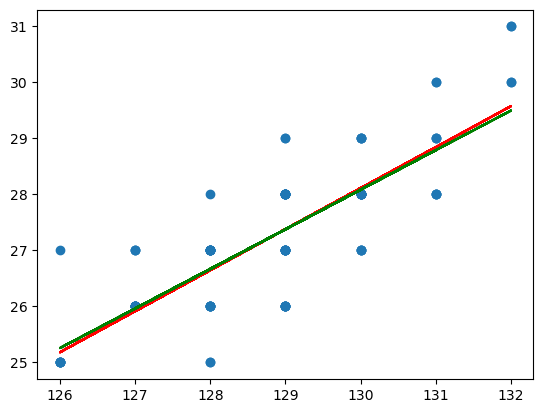

In [237]:
coefficients = cool_regression(x, y)
coefficients_not_cool = not_so_cool_regression_linear(x, y)
y_estimate = cool_function(x, coefficients)
y_estimate_not_cool = cool_function(x, coefficients_not_cool)
plt.plot(x, y_estimate, color='red')
plt.plot(x, y_estimate_not_cool, color='green')
plt.scatter(x, y)

In [238]:
np.sum(np.abs(y_estimate_not_cool - y_estimate)) / n

0.030718319756046636

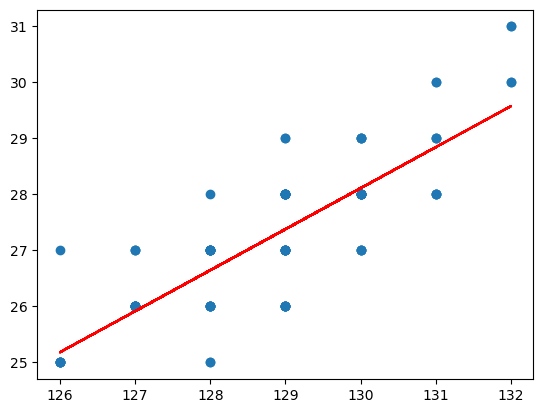

In [199]:
coefficients = cool_regression(x, y, scale=3)
y_estimate_2 = cool_function(x, coefficients)
plt.plot(x, y_estimate_2, color='red')
plt.scatter(x, y)

Среднеквадратическое отклонение между двумя полученными функциями

In [200]:
error = np.sqrt(np.sum(np.power(y_estimate - y_estimate_2, 2))) / n
error

5.347729081535445e-10

In [201]:
np.round(error, 5) == 0

True

Среднеквадратическое отклонение между реальными данными и полученной функцией

In [202]:
error = np.sqrt(np.sum(np.power(y - y_estimate, 2))) / n
error

0.07973060516876657